# Classification of Genomic Structural Variants
## Reading Structural Variant Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### Visualization

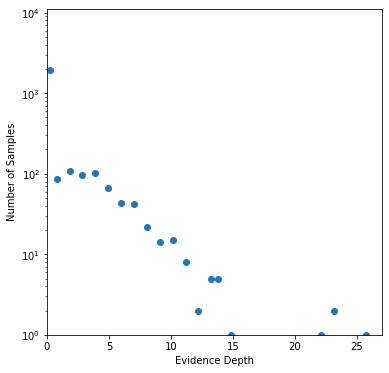

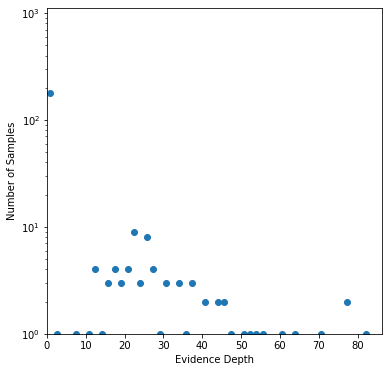

In [3]:
# Load in actual sample for structural variant data
# - read in data
# - take counts of each depth
# - arrange data as a histogram
# - plot data, as evidence depth against # of samples

fig, ax = plt.subplots(figsize = (6,6))
sv_1kg = pd.read_csv('../data/histogram_ex_1kg.csv', header = None)
samples_1kg = sv_1kg.values[0]
hist, bin_edges = np.histogram(samples_1kg, bins=50, density=False)
bin_center = (bin_edges[:-1] + bin_edges[1:])/2

plt.scatter(bin_center, hist)
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_xlim(left=0)
plt.xlabel('Evidence Depth')
plt.ylabel('Number of Samples')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
sv_sgdp = pd.read_csv('../data/histogram_ex_sgdp.csv', header = None)
samples_sgdp = sv_sgdp.values[0]
hist, bin_edges = np.histogram(samples_sgdp, bins=50, density=False)
bin_center = (bin_edges[:-1] + bin_edges[1:])/2

plt.scatter(bin_center, hist)
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_xlim(left=0)
plt.xlabel('Evidence Depth')
plt.ylabel('Number of Samples')
plt.show()

### Noise Discovery

In [9]:
# Reading in genotype count data

counts_filename = '../data/counts.txt'
gt_counts = pd.read_csv(counts_filename, sep='\t')
gt_counts
# count:0|1 p|q, count:1|1

,#chrom,start,end,counts[0|1],counts[1|0],counts[1|1]
0,1,738570,742020,0,1,0
1,1,766600,769112,65,109,7
2,1,775292,791968,7,8,0
3,1,794496,799549,0,2,0
4,1,873391,874042,4,3,0
...,...,...,...,...,...,...
40970,X,155040763,155047741,5,4,0
40971,X,155049579,155049648,7,6,0
40972,X,155090084,155092227,85,74,17
40973,X,155122541,155122677,1,0,0


In [10]:
# Filtering genotype count data 
# - the parameter q should be close to 0

# TODO: determine underlying meaning of [0|1] [1|0] [1|1]...
# [1|1] = q?
# total - [0|1]+[1|0] = p? 

gt_counts['q'] = gt_counts.loc[: , ['counts[0|1]', 'counts[1|0]']].sum(axis=1)
gt_counts_q1 = gt_counts[gt_counts.q == 1]
gt_counts_q1

,#chrom,start,end,counts[0|1],counts[1|0],counts[1|1],q
0,1,738570,742020,0,1,0,1
5,1,939918,939968,1,0,0,1
8,1,1019492,1019819,1,0,0,1
13,1,1240709,1240791,0,1,0,1
18,1,1417868,1417928,0,1,0,1
...,...,...,...,...,...,...,...
40906,X,150997048,150997275,1,0,0,1
40938,X,154017323,154017395,1,0,0,1
40945,X,154313357,154314049,0,1,0,1
40949,X,154403956,154404042,1,0,0,1


In [11]:
# Reading in STIX queries

query_filename = '../data/1kg_stix_queries.txt'
stix_queries = pd.read_csv(query_filename, sep = '\t')
stix_queries

,query_l,query_r,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,1:738222-738570,1:742020-742374,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:939918-939918,1:939968-939968,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:1294138-1294138,1:1294195-1294195,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1:1417868-1417868,1:1417928-1417928,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1:1240709-1240709,1:1240791-1240791,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12702,5:61721140-61721315,5:61722984-61723162,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,5:61911374-61911374,5:61911446-61911446,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,5:61424233-61424342,5:61470982-61471091,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12705,5:61900776-61900802,5:61904135-61904161,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Split query according to chromosome 

# TODO: match query on chromosome

stix_queries['query_l'] = stix_queries['query_l'].str.split('-').str[1] 
stix_queries['query_r'] = stix_queries['query_r'].str.split('-').str[0]
stix_queries['query_r'] = stix_queries['query_r'].str.split(':').str[1] 
stix_queries

,query_l,query_r,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,738570,742020,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,939918,939968,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1294138,1294195,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1417868,1417928,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1240709,1240791,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12702,61721315,61722984,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,61911374,61911446,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,61424342,61470982,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12705,61900802,61904135,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Filter the query to match it with the genotype counts of q = 1

stix_queries_q1 = stix_queries[stix_queries['query_l'].isin(gt_counts_q1['start'].apply(str))]
stix_queries_q1 = stix_queries_q1[stix_queries_q1['query_r'].isin(gt_counts_q1['end'].apply(str))]
stix_queries_q1

,query_l,query_r,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,738570,742020,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,939918,939968,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1417868,1417928,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1240709,1240791,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1772216,1773658,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12681,60099077,60099348,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12693,60801440,60801513,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12695,60630908,60640618,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12696,60986098,60986186,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Drop query columns to retain only count data

stix_queries_q1_ni = stix_queries_q1.loc[:, ~stix_queries_q1.columns.isin(['query_l', 'query_r'])]
stix_queries_q1_ni
stix_queries_q1_ni.dropna()

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,HG00106,HG00107,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12681,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12693,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12695,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12696,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Count the evidence depths associated with the queries that have genotype counts that are likely to be noise
# - the approximation for noise is q = 1

noise = dict(stix_queries_q1_ni.iloc[0].value_counts())
for sv in range(1, len(stix_queries_q1_ni)):
    noise = Counter(dict(stix_queries_q1_ni.iloc[sv].value_counts())) + Counter(noise)
noise = dict(noise)
noise = [key for key, val in noise.items() for _ in range(val)]

Text(0.5, 1.0, 'Distribution of All Values from q = ~1/2500')

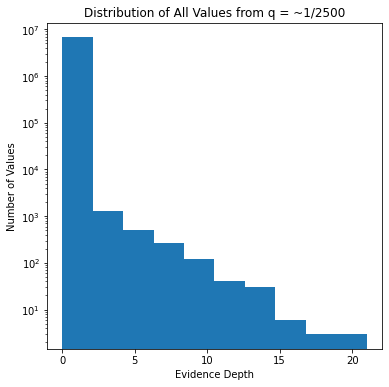

In [18]:
# Plot the results for noise being counted

fig, ax = plt.subplots(figsize = (6,6))
ax.set_yscale("log")
plt.hist(noise, bins=10) 
plt.ylabel('Number of Values')
plt.xlabel('Evidence Depth')
plt.title('Distribution of All Values from q = ~1/2500')

In [25]:
# Modify to count evidence depths of genotype count q = 1, but without an evidence depth of 0

noise = dict(stix_queries_q1_ni.iloc[0].value_counts())
for sv in range(1, len(stix_queries_q1_ni)):
    noise = Counter(dict(stix_queries_q1_ni.iloc[sv].value_counts())) + Counter(noise)
noise = dict(noise)
noise.pop(0, None)
noise = [key for key, val in noise.items() for _ in range(val)]

Text(0.5, 1.0, 'Distribution of All Values from q = ~1/2500')

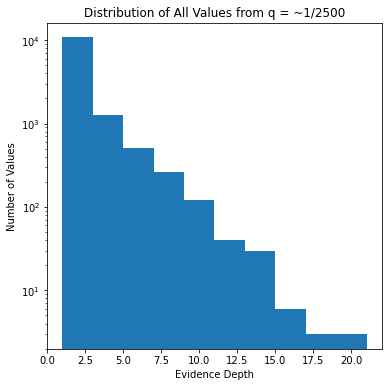

In [21]:
# Plot the results for noise being counted

fig, ax = plt.subplots(figsize = (6,6))
ax.set_yscale("log")
plt.hist(noise, bins=10) 
plt.ylabel('Number of Values')
plt.xlabel('Evidence Depth')
plt.title('Distribution of All Values from q = ~1/2500')

### Parameter Estimation and Visualization

In [27]:
# Get the proportion of zeros there are in the entire noise data set

noise = dict(stix_queries_q1_ni.iloc[0].value_counts())
prop_zero = noise[0] / sum(noise.values())
prop_zero

0.9992110453648915

In [28]:
# Store all of the individual proportions of zero in each query for noise

props = []
for sv in range(len(stix_queries_q1_ni)):
    noise = dict(stix_queries_q1_ni.iloc[sv].value_counts())
    prop = noise[0] / sum(noise.values())
    props.append(prop)

Text(0, 0.5, 'Frequency')

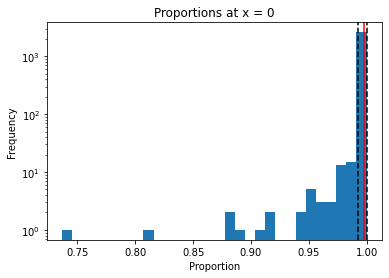

In [29]:
# Plot the proportion of evidence depth of 0 over the noise data set

conf = 0.95
ci = np.percentile(props,[100*(1-conf)/2,100*(1-(1-conf)/2)])
plt.hist(props, bins = 30)
plt.yscale('log')
plt.axvline(np.mean(props), color='red')
plt.axvline(ci[0], color = 'k', linestyle = '--')
plt.axvline(ci[1], color = 'k', linestyle = '--')
plt.title('Proportions at x = 0')
plt.xlabel('Proportion')
plt.ylabel('Frequency')

In [86]:
# Retrieve the distribution of p
# - p is the number of occurences of a random evidence depth as a proportion over all the structural variants

# TODO: refine this process, verify that it's proper

p = []
N = 2535
for sv in range(len(stix_queries_q1_ni)):
    query = list(stix_queries_q1_ni.iloc[sv])
    np.random.shuffle(query)
    trials = next((index for index,value in enumerate(query) if value != 0), None)
    if trials != None:
        p.append(trials/N)
print(len(p))


1838


Text(0, 0.5, 'Frequency')

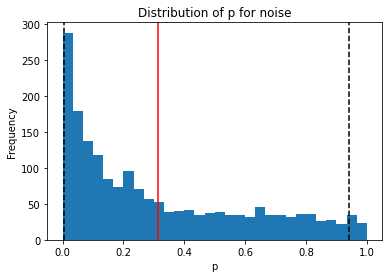

In [87]:
conf = 0.95
ci = np.percentile(p,[100*(1-conf)/2,100*(1-(1-conf)/2)])
plt.hist(p, bins = 30)
plt.axvline(np.mean(p), color='red')
plt.axvline(ci[0], color = 'k', linestyle = '--')
plt.axvline(ci[1], color = 'k', linestyle = '--')
plt.title('Distribution of p for noise')
plt.xlabel('p')
plt.ylabel('Frequency')